In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
%matplotlib inline

# Preparing Data

In [2]:
os.chdir('/kaggle/input/pavia-university-hsi')
os.listdir()

['PaviaU_gt.mat', 'PaviaU.mat']

In [3]:
mat = scipy.io.loadmat('PaviaU.mat')
data_1 = mat['paviaU']
data_1 = data_1.reshape(207400,103)
df = pd.DataFrame(data_1)
df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,647,499,464,371,291,319,365,322,296,305,...,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250
1,604,546,527,455,378,377,336,314,324,329,...,2605,2583,2538,2509,2511,2501,2468,2442,2464,2528
2,621,746,556,360,285,300,274,276,332,319,...,2282,2288,2242,2193,2202,2225,2266,2308,2345,2361
3,637,592,482,556,508,284,178,198,193,224,...,2684,2675,2609,2541,2551,2571,2569,2573,2620,2644
4,625,560,480,360,377,341,264,208,231,266,...,2423,2392,2344,2289,2328,2415,2424,2386,2431,2456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,574,594,504,411,468,443,378,342,352,434,...,2130,2150,2157,2157,2169,2151,2108,2077,2076,2136
207396,485,644,709,582,504,494,434,373,391,421,...,2218,2264,2295,2282,2265,2275,2293,2274,2274,2258
207397,593,387,428,461,470,392,331,383,439,355,...,2384,2393,2407,2433,2413,2373,2389,2382,2407,2423
207398,593,751,655,458,503,560,482,412,404,454,...,2338,2340,2333,2332,2288,2251,2280,2312,2308,2289


In [4]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale);
df_scale.head(5)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.080875,0.062375,0.058000,0.046375,0.036375,0.039875,0.045625,0.04025,0.037000,0.038125,...,0.427500,0.427000,0.416875,0.396053,0.392157,0.389172,0.390585,0.402625,0.394610,0.406250
1,0.075500,0.068250,0.065875,0.056875,0.047250,0.047125,0.042000,0.03925,0.040500,0.041125,...,0.325625,0.322875,0.317250,0.300955,0.301120,0.299490,0.296183,0.305250,0.296212,0.316000
2,0.077625,0.093250,0.069500,0.045000,0.035625,0.037500,0.034250,0.03450,0.041500,0.039875,...,0.285250,0.286000,0.280250,0.260726,0.261777,0.264331,0.270483,0.288500,0.281083,0.295125
3,0.079625,0.074000,0.060250,0.069500,0.063500,0.035500,0.022250,0.02475,0.024125,0.028000,...,0.335500,0.334375,0.326125,0.305029,0.306213,0.308408,0.309033,0.321625,0.316044,0.330500
4,0.078125,0.070000,0.060000,0.045000,0.047125,0.042625,0.033000,0.02600,0.028875,0.033250,...,0.302875,0.299000,0.293000,0.272947,0.277820,0.288535,0.290585,0.298250,0.292016,0.307000


# K-means Clustering and Making Prediction

In [5]:
km=KMeans(n_clusters=9)
predicted = km.fit_predict(df_scale)
predicted = predicted + 1

In [6]:
labels = km.labels_
accuracy = davies_bouldin_score(df_scale, labels)
print('Accuracy :',accuracy)

Accuracy : 0.8508388152594889


<AxesSubplot:xlabel='0', ylabel='1'>

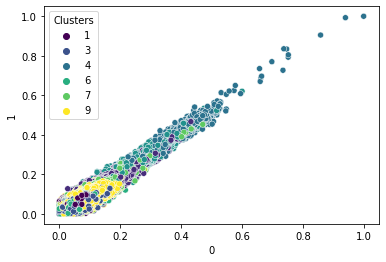

In [7]:
df_scale['Clusters'] = (labels + 1)
sns.scatterplot(x=0, y=1,hue = 'Clusters', data=df_scale, palette='viridis')

In [8]:
df_scale

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,Clusters
0,0.080875,0.062375,0.058000,0.046375,0.036375,0.039875,0.045625,0.040250,0.037000,0.038125,...,0.427000,0.416875,0.396053,0.392157,0.389172,0.390585,0.402625,0.394610,0.406250,3
1,0.075500,0.068250,0.065875,0.056875,0.047250,0.047125,0.042000,0.039250,0.040500,0.041125,...,0.322875,0.317250,0.300955,0.301120,0.299490,0.296183,0.305250,0.296212,0.316000,3
2,0.077625,0.093250,0.069500,0.045000,0.035625,0.037500,0.034250,0.034500,0.041500,0.039875,...,0.286000,0.280250,0.260726,0.261777,0.264331,0.270483,0.288500,0.281083,0.295125,1
3,0.079625,0.074000,0.060250,0.069500,0.063500,0.035500,0.022250,0.024750,0.024125,0.028000,...,0.334375,0.326125,0.305029,0.306213,0.308408,0.309033,0.321625,0.316044,0.330500,3
4,0.078125,0.070000,0.060000,0.045000,0.047125,0.042625,0.033000,0.026000,0.028875,0.033250,...,0.299000,0.293000,0.272947,0.277820,0.288535,0.290585,0.298250,0.292016,0.307000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,0.071750,0.074250,0.063000,0.051375,0.058500,0.055375,0.047250,0.042750,0.044000,0.054250,...,0.268750,0.269625,0.256143,0.257576,0.254904,0.250382,0.259625,0.246885,0.267000,1
207396,0.060625,0.080500,0.088625,0.072750,0.063000,0.061750,0.054250,0.046625,0.048875,0.052625,...,0.283000,0.286875,0.272056,0.269799,0.270701,0.273919,0.284250,0.272057,0.282250,1
207397,0.074125,0.048375,0.053500,0.057625,0.058750,0.049000,0.041375,0.047875,0.054875,0.044375,...,0.299125,0.300875,0.291279,0.288643,0.283185,0.286132,0.297750,0.288965,0.302875,1
207398,0.074125,0.093875,0.081875,0.057250,0.062875,0.070000,0.060250,0.051500,0.050500,0.056750,...,0.292500,0.291625,0.278421,0.272727,0.267643,0.272265,0.289000,0.276379,0.286125,1


In [9]:
image = predicted.reshape(610,340)
image

array([[3, 3, 1, ..., 3, 3, 3],
       [3, 1, 8, ..., 3, 3, 1],
       [1, 8, 8, ..., 9, 3, 3],
       ...,
       [9, 7, 7, ..., 1, 1, 3],
       [9, 9, 7, ..., 3, 1, 3],
       [9, 9, 9, ..., 1, 1, 3]], dtype=int32)

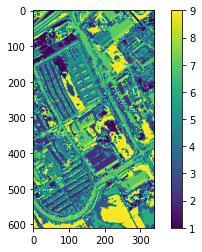

In [10]:
imgplot = plt.imshow(image)
plt.colorbar()

# Set all pixels of the prediction 0, which were 0 in PaviaU_gt

In [11]:
mat = scipy.io.loadmat('PaviaU_gt.mat')
data_2 = mat['paviaU_gt']
df_2 = pd.DataFrame(data_2)
df_2

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
606,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
607,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
608,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
last_image = image
for x in range(610):
    for y in range(340):
        if data_2[x][y] == 0:
            last_image[x][y] = 0
last_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 7, 7, ..., 0, 0, 0],
       [9, 9, 7, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0]], dtype=int32)

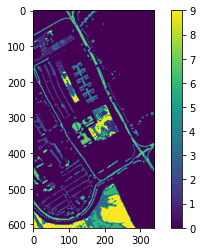

In [13]:
imgplot_2 = plt.imshow(last_image)
plt.colorbar()